## Exercise 1

$A1 = *0**01***$      ,$l(A1)=9, o(A1)=4$

$A2 = **010*111$      ,$l(A2)=9, o(A2)=6$

$p_m = 0.01$

General formula for the Probability of surviving a mutation: $S_m(H) = (1 - p_m)^{o(H)}$

$S_m(A1) = (1-0.01)^4 = 0.99^4 \approx 0.96 $

$S_m(A2) = (1-0.01)^6 = 0.99^6 \approx 0.94 $

So the probability of surviving the mutation is higher for schema A1 than schema A2 since $S_m(A1) \gt S_m(A2)$

## Exercise 4

In [92]:
from random import randint
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [104]:
def invert(bit, p):
    if (random() < p):
        return 1-bit
    return bit

def GA(l=100, n_iterations=1500):
    p = 1/l
    
    #a: randomly generate a bit sequence x
    X = [randint(0,1) for x in range(0,l)]
    hist = [X]
    
    for i in range(n_iterations):  
        #b: create a copy of x and invert each of its bits with probability p. Let Xm be te result
        X_m = [invert(x,p) for x in X]

        #c: if x_m is closer to the goal sequence than x then repalce x with x_m
        if (sum(X_m) > sum(X)):
            X = X_m
        hist.append(X)
    
    return X, hist


def plot_fitness(hist):
    iterations = len(hist) -1
    x = [x for x in range(1,iterations+1)]
    y = [sum(x) for x in hist[1:]]
    plt.plot(x,y)
    plt.xlabel('number of iterations')
    plt.ylabel('best fitness')
    plt.title('Plot of the best fitness against the elapsed number of iterations')
    plt.show()


### 4a

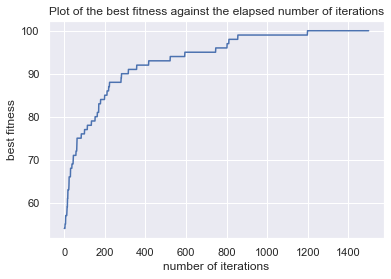

In [105]:
X, hist = GA(l=100, n_iterations = 1500)
plot_fitness(hist)

### 4b

In [106]:
runs = [sum(GA()[0]) for x in range(10)]
optimum_found = runs.count(100)
print(f'After 10 runs, the algorithm have found the optimum {optimum_found} times')

After 10 runs, the algorithm have found the optimum 9 times


### 4c

Let's alter step c in the algorithm:

In [109]:
def GA(l=100, n_iterations=1500):
    p = 1/l
    
    #a: randomly generate a bit sequence x
    X = [randint(0,1) for x in range(0,l)]
    hist = [X]
    
    for i in range(n_iterations):  
        #b: create a copy of x and invert each of its bits with probability p. Let Xm be te result
        X_m = [invert(x,p) for x in X]

        #c: if x_m is closer to the goal sequence than x then repalce x with x_m
        X = X_m
        hist.append(X)
    
    return X, hist

And look at the difference in the plot:

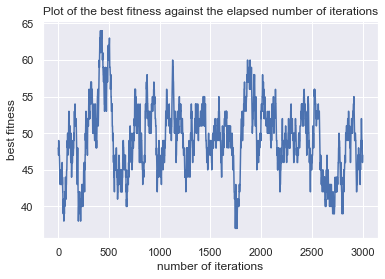

In [110]:
X, hist = GA(l=100, n_iterations = 3000)
plot_fitness(hist)

The difference is that the mutation now always is propogated, regardless of the impact on the 'fitness'. Therefore, the algorithm has become unstable, the changes to the bit sequences are now purely based on a random probability and the algorithm will therefore never converge. 